<a href="https://colab.research.google.com/github/JasperAD11/Sentiment-Across-Signals-Neural-Networks-vs.-LLMs/blob/main/Part2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from model import create_ensemble_model, predict_ensemble_model
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import TextVectorization, Input, Embedding, LSTM, Dropout, Dense
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [5]:
df=pd.read_csv("df_merged.csv")

In [3]:
joint_model=create_ensemble_model("best_model_binary.h5","best_model_multi.h5")

In [6]:
df

,filename,sentiment,emotion,text,whisper_transcription
0,audio1.m4a,positive,approval,That was a fantastic presentation. I'm really ...,That was a fantastic presentation. I'm really...
1,audio2.m4a,positive,annoyance,I cannot believe this is happening again. It i...,I cannot believe this is happening again. It ...
2,audio3.m4a,positive,disapproval,I really don't think this is the right decision.,I really don't think this is the right decision.
3,audio4.m4a,positive,gratitude,Thank you so much for your help. I truly appre...,Thank you so much for your help. I truly appr...
4,audio5.m4a,positive,curiosity,I wonder how that works. I'd love to know more...,I wonder how that works. I'd love to know mor...
...,...,...,...,...,...
117,audio119.m4a,negative,annoyance,"It feels like I'm stuck in a loop, unable to e...","It feels like I'm stuck in a loop, unable to ..."
118,audio120.m4a,negative,annoyance,The more I try the worse it gets.,The more I try the worse it gets.
119,audio121.m4a,negative,annoyance,It's impossible to keep up with everything.,It's impossible to keep up with everything.
120,audio122.m4a,negative,annoyance,I'm getting tired of repeating myself.,I'm getting tired of repeating myself.


In [7]:
max_vocab = 20000
sequence_len = 300

vectorizer = TextVectorization(
    max_tokens=max_vocab,
    output_mode='int',
    output_sequence_length=sequence_len
)

vectorizer.adapt(df["whisper_transcription"])

df["sentiment_transcript"] = df["whisper_transcription"].apply(lambda x: predict_ensemble_model(joint_model, [x], vectorizer)['sentiment'])
df['sentiment_match_transcript'] = (df['sentiment_transcript'] == df['sentiment']).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

In [8]:
df["sentiment_original"] = df["text"].apply(lambda x: predict_ensemble_model(joint_model, [x], vectorizer)['sentiment'])
df['sentiment_match_original'] = (df['sentiment_original'] == df['sentiment']).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━

In [9]:
df["emotion_transcript"] = df["whisper_transcription"].apply(lambda x: predict_ensemble_model(joint_model, [x], vectorizer)['emotion'])
df['emotion_match_transcript'] = df.apply(lambda row: 1 if row['emotion'] in row['emotion_transcript'] else 0, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━

In [10]:
df["emotion_original"] = df["text"].apply(lambda x: predict_ensemble_model(joint_model, [x], vectorizer)['emotion'])
df['emotion_match_original'] = df.apply(lambda row: 1 if row['emotion'] in row['emotion_original'] else 0, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

In [11]:
df

,filename,sentiment,emotion,text,whisper_transcription,sentiment_transcript,sentiment_match_transcript,sentiment_original,sentiment_match_original,emotion_transcript,emotion_match_transcript,emotion_original,emotion_match_original
0,audio1.m4a,positive,approval,That was a fantastic presentation. I'm really ...,That was a fantastic presentation. I'm really...,positive,1,positive,1,[neutral],0,[neutral],0
1,audio2.m4a,positive,annoyance,I cannot believe this is happening again. It i...,I cannot believe this is happening again. It ...,positive,1,positive,1,[admiration],0,[admiration],0
2,audio3.m4a,positive,disapproval,I really don't think this is the right decision.,I really don't think this is the right decision.,positive,1,positive,1,[neutral],0,[neutral],0
3,audio4.m4a,positive,gratitude,Thank you so much for your help. I truly appre...,Thank you so much for your help. I truly appr...,positive,1,positive,1,[neutral],0,[neutral],0
4,audio5.m4a,positive,curiosity,I wonder how that works. I'd love to know more...,I wonder how that works. I'd love to know mor...,positive,1,positive,1,[approval],0,[approval],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,audio119.m4a,negative,annoyance,"It feels like I'm stuck in a loop, unable to e...","It feels like I'm stuck in a loop, unable to ...",positive,0,positive,0,[admiration],0,[admiration],0
118,audio120.m4a,negative,annoyance,The more I try the worse it gets.,The more I try the worse it gets.,positive,0,positive,0,[neutral],0,[neutral],0
119,audio121.m4a,negative,annoyance,It's impossible to keep up with everything.,It's impossible to keep up with everything.,positive,0,positive,0,[neutral],0,[neutral],0
120,audio122.m4a,negative,annoyance,I'm getting tired of repeating myself.,I'm getting tired of repeating myself.,positive,0,positive,0,[neutral],0,[neutral],0


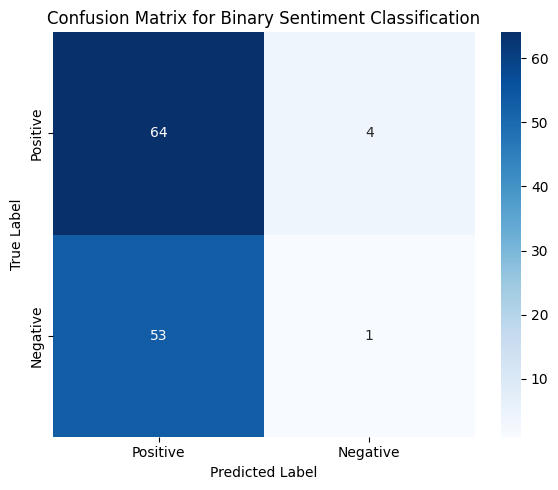


Classification Report:
              precision    recall  f1-score   support

    negative     0.2000    0.0185    0.0339        54
    positive     0.5470    0.9412    0.6919        68

    accuracy                         0.5328       122
   macro avg     0.3735    0.4798    0.3629       122
weighted avg     0.3934    0.5328    0.4006       122



In [20]:
true_sentiment = df["sentiment"].str.lower()
pred_sentiment = df["sentiment_original"].str.lower()

cm = confusion_matrix(true_sentiment, pred_sentiment, labels=["positive", "negative"])

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.title("Confusion Matrix for Binary Sentiment Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Optional: classification report
print("\nClassification Report:")
print(classification_report(true_sentiment, pred_sentiment, digits=4))

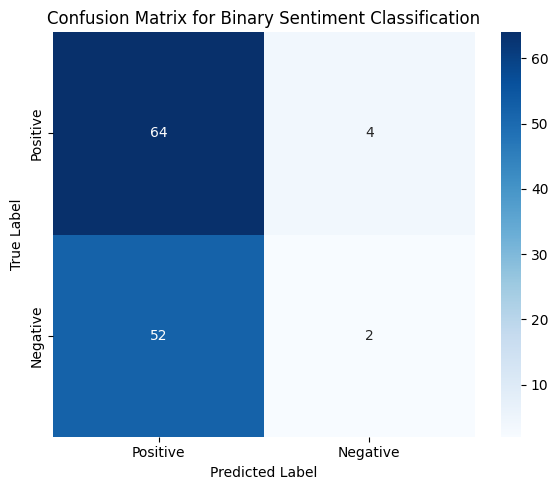


Classification Report:
              precision    recall  f1-score   support

    negative     0.3333    0.0370    0.0667        54
    positive     0.5517    0.9412    0.6957        68

    accuracy                         0.5410       122
   macro avg     0.4425    0.4891    0.3812       122
weighted avg     0.4551    0.5410    0.4172       122



In [21]:
true_sentiment = df["sentiment"].str.lower()
pred_sentiment = df["sentiment_transcript"].str.lower()

cm = confusion_matrix(true_sentiment, pred_sentiment, labels=["positive", "negative"])

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])
plt.title("Confusion Matrix for Binary Sentiment Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Optional: classification report
print("\nClassification Report:")
print(classification_report(true_sentiment, pred_sentiment, digits=4))

In [22]:
sent_original_perc = df['sentiment_match_original'].mean()
sent_trans_perc = df['sentiment_match_transcript'].mean()
emo_original_perc = df['emotion_match_original'].mean()
emo_trans_perc = df['emotion_match_transcript'].mean()

In [23]:
print(f"Sentiment Match (Original) Percentage: {sent_original_perc:.2f}%")
print(f"Sentiment Match (Transcript) Percentage: {sent_trans_perc:.2f}%")
print(f"Emotion Match (Original) Percentage: {emo_original_perc:.2f}%")
print(f"Emotion Match (Transcript) Percentage: {emo_trans_perc:.2f}%")

Sentiment Match (Original) Percentage: 0.53%
Sentiment Match (Transcript) Percentage: 0.54%
Emotion Match (Original) Percentage: 0.02%
Emotion Match (Transcript) Percentage: 0.02%
